## Project 1: NYC Resteraunt Violations Cleaning Up
### Jacob Minkin

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set_style('darkgrid')

%matplotlib inline

## Set-Up

In [4]:
#Import Data
df = pd.read_csv('../data/Inspection.csv')

#Change Name of Column for easier searching
df.rename(columns = {'VIOLATION CODE':'CODE'}, inplace = True)

# Convert date into pandas date/time format
df['date'] = pd.to_datetime(df['INSPECTION DATE'])

# Create Dictionaries for Violation Codes and Resteraunt Names
code_list = df.CODE[df.CODE.isna() == False].unique()
violation_dicts = {}
for name in code_list:
    violation_dicts[name] = df.VIOLATION[df.CODE == name].unique()

Name_list = df.CAMIS[df.CAMIS.isna() == False].unique()
Name_dicts = {}
for name in Name_list:
    Name_dicts[name] = df.DBA[df.CAMIS == name].unique()

#Choose variables for final analysis
finalVariables = ['CAMIS','CUISINE','STREET', 'ZIPCODE', 'Community Board', 'BBL', 'BORO', 'date', 'CRITICAL FLAG']
fdf = df[finalVariables]

# df = df.drop(['Zip Codes', 'City Council Districts', 'Police Precincts', 'Location Point', 'Community Districts', 
#    'Borough Boundaries',  'GRADE DATE', 'PHONE', 'INSPECTION DATE', 'DBA', 'VIOLATION', 'RECORD DATE'], axis = 1)

# List of CONVERSION to categorical functions. 
to_convert = ['ZIPCODE', 'Community Board']
fdf[to_convert] = fdf[to_convert].astype('category')

C:\Users\logic_switch\AppData\Local\Temp\ipykernel_23512\1899942372.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf[to_convert] = fdf[to_convert].astype('category')


In [5]:
Variables = ['CAMIS', 'ZIPCODE', 'Community Board', 'BBL', 'BORO']
vdf = df[finalVariables]

In [9]:
vdf.groupby(['CAMIS']).first()

,CUISINE,STREET,ZIPCODE,Community Board,BBL,BORO,date,CRITICAL FLAG
CAMIS,,,,,,,,
30075445,Bakery Products/Desserts,MORRIS PARK AVENUE,10462.0,211.0,2.041270e+09,Bronx,2023-01-31,Critical
30112340,Hamburgers,FLATBUSH AVENUE,11225.0,309.0,3.011970e+09,Brooklyn,2021-08-05,Critical
30191841,Irish,WEST 57 STREET,10019.0,104.0,1.010480e+09,Manhattan,2019-06-06,Not Critical
40356018,American,STILLWELL AVENUE,11224.0,313.0,3.069970e+09,Brooklyn,2019-11-08,Not Critical
40356483,Sandwiches,AVENUE U,11234.0,318.0,3.084310e+09,Brooklyn,2021-07-30,Critical
...,...,...,...,...,...,...,...,...
50132511,None,AVENUE O,11204.0,311.0,3.066020e+09,Brooklyn,1900-01-01,Not Applicable
50132516,None,EAST 13 STREET,10009.0,103.0,1.004400e+09,Manhattan,1900-01-01,Not Applicable
50132518,None,ATLANTIC AVE,11416.0,409.0,4.093800e+09,Queens,1900-01-01,Not Applicable


In [10]:
vdf

CUISINE            4358
Community Board    3468
ZIPCODE            2933
BBL                 561
STREET               26
CAMIS                 0
BORO                  0
date                  0
CRITICAL FLAG         0
dtype: int64

## Examine Missing Data

In [45]:
df.isnull().sum(axis = 0).sort_values(ascending = False)

GRADE               106150
SCORE                10915
CODE                  5681
BIN                   4561
INSPECTION TYPE       4358
CUISINE               4358
ACTION                4358
Council District      3468
Community Board       3468
Census Tract          3468
NTA                   3468
ZIPCODE               2933
BBL                    561
BUILDING               340
Latitude               298
Longitude              298
STREET                  26
CAMIS                    0
RECORD DATE              0
BORO                     0
CRITICAL FLAG            0
date                     0
dtype: int64

In [52]:
f_variables = ['CAMIS', 'CUISINE', 'BORO', 'ZIPCODE', 'NTA', 'Census Tract', 'Community Board', 'Council District']
fdf = df[f_variables]

<AxesSubplot:>

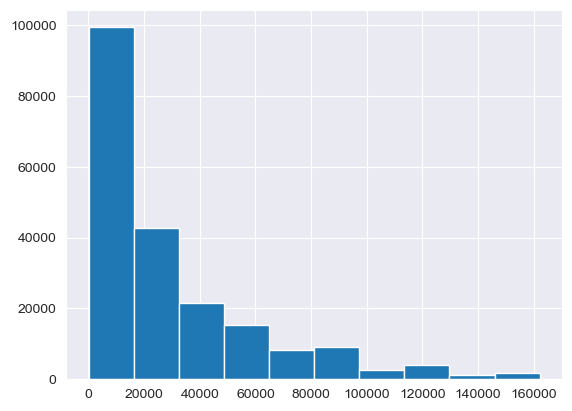

In [58]:
fdf['Census Tract'].hist()

<AxesSubplot:>

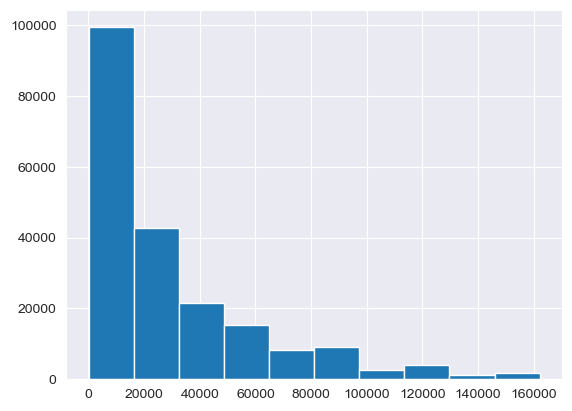

In [15]:
df['Census Tract'].hist()

In [40]:
df['Community Board']

0         102.0
1         301.0
2         102.0
3           NaN
4         502.0
          ...  
209574    306.0
209575    102.0
209576    316.0
209577    104.0
209578      NaN
Name: Community Board, Length: 209579, dtype: float64

In [39]:
df.ACTION.value_counts()

Violations were cited in the following area(s).                                                                                       193989
Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.      7936
Establishment re-opened by DOHMH.                                                                                                       1985
No violations were recorded at the time of this inspection.                                                                             1299
Establishment re-closed by DOHMH.                                                                                                         12
Name: ACTION, dtype: int64